## Support Vector Machines

## Que: Implement a SVM model to classify salary data

## Importing Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

## Importing the Data

In [20]:
salary_data_train = pd.read_csv('/content/SalaryData_Train.csv')
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
salary_data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
salary_data_train.loc[salary_data_train.duplicated(),:]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [23]:
salary_data_train = salary_data_train.drop_duplicates().reset_index()

In [24]:
salary_data_train.shape

(26903, 15)

In [25]:
salary_data_train.loc[salary_data_train.duplicated(),:]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [26]:
salary_data_train.dtypes

index             int64
age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [27]:
salary_data_train['workclass']=salary_data_train['workclass'].astype('category')
salary_data_train['education']=salary_data_train['education'].astype('category')
salary_data_train['maritalstatus']=salary_data_train['maritalstatus'].astype('category')
salary_data_train['occupation']=salary_data_train['occupation'].astype('category')
salary_data_train['relationship']=salary_data_train['relationship'].astype('category')
salary_data_train['race']=salary_data_train['race'].astype('category')
salary_data_train['sex']=salary_data_train['sex'].astype('category')
salary_data_train['native']=salary_data_train['native'].astype('category')
salary_data_train['Salary']=salary_data_train['Salary'].astype('category')

In [28]:
salary_data_train.dtypes

index               int64
age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary           category
dtype: object

## Data Preparation

In [29]:
salary_data_train['workclass']=salary_data_train['workclass'].cat.codes
salary_data_train['education']=salary_data_train['education'].cat.codes
salary_data_train['maritalstatus']=salary_data_train['maritalstatus'].cat.codes
salary_data_train['occupation']=salary_data_train['occupation'].cat.codes
salary_data_train['relationship']=salary_data_train['relationship'].cat.codes
salary_data_train['race']=salary_data_train['race'].cat.codes
salary_data_train['sex']=salary_data_train['sex'].cat.codes
salary_data_train['native']=salary_data_train['native'].cat.codes
salary_data_train['Salary']=salary_data_train['Salary'].cat.codes

salary_data_train

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
26899,30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
26900,30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
26901,30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [30]:
salary_data_train_d1= salary_data_train.iloc[:,1:14]
salary_data_train_d1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37
26899,22,2,15,10,4,10,1,4,1,0,0,40,37
26900,27,2,7,12,2,12,5,4,0,0,0,38,37
26901,58,2,11,9,6,0,4,4,0,0,0,40,37


In [31]:
salary_data_train_d1.dtypes

age              int64
workclass         int8
education         int8
educationno      int64
maritalstatus     int8
occupation        int8
relationship      int8
race              int8
sex               int8
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native            int8
dtype: object

In [32]:
st_model= StandardScaler()

In [33]:
list(salary_data_train_d1.columns.values)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

In [34]:
scaler_data = st_model.fit_transform(salary_data_train_d1)
salary_data_train_d2 = pd.DataFrame(scaler_data,columns=list(salary_data_train_d1.columns))
salary_data_train_d2 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.003726,2.791383,-0.324519,1.089919,0.939836,-1.503368,-0.277736,0.406417,0.705589,0.122810,-0.23133,-0.094323,0.282414
1,0.830329,1.788156,-0.324519,1.089919,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-2.281121,0.282414
2,-0.079549,-0.218299,0.192999,-0.436737,-1.676988,-0.261669,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
3,1.057799,-0.218299,-2.394592,-1.200065,-0.368576,-0.261669,-0.895505,-1.889403,0.705589,-0.155722,-0.23133,-0.094323,0.282414
4,-0.837781,-0.218299,-0.324519,1.089919,-0.368576,0.731690,2.193341,-1.889403,-1.417255,-0.155722,-0.23133,-0.094323,-4.979105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1.057799,-0.218299,0.451758,1.471583,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
26899,-1.292720,-0.218299,1.228036,-0.055073,0.939836,0.980030,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
26900,-0.913604,-0.218299,-0.842037,0.708255,-0.368576,1.476709,2.193341,0.406417,-1.417255,-0.155722,-0.23133,-0.256308,0.282414
26901,1.436914,-0.218299,0.192999,-0.436737,2.248248,-1.503368,1.575572,0.406417,-1.417255,-0.155722,-0.23133,-0.094323,0.282414


In [35]:
X_train=salary_data_train_d2 
y_train=salary_data_train['Salary']

In [36]:
salary_data_test = pd.read_csv('/content/SalaryData_Test.csv')
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [37]:
salary_data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [38]:
salary_data_test.loc[salary_data_test.duplicated(),:]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [39]:
salary_data_test = salary_data_test.drop_duplicates().reset_index()

In [40]:
salary_data_test.shape

(14130, 15)

In [41]:
salary_data_test.loc[salary_data_test.duplicated(),:]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [42]:
salary_data_test.dtypes

index             int64
age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [43]:
salary_data_test['workclass']=salary_data_test['workclass'].astype('category')
salary_data_test['education']=salary_data_test['education'].astype('category')
salary_data_test['maritalstatus']=salary_data_test['maritalstatus'].astype('category')
salary_data_test['occupation']=salary_data_test['occupation'].astype('category')
salary_data_test['relationship']=salary_data_test['relationship'].astype('category')
salary_data_test['race']=salary_data_test['race'].astype('category')
salary_data_test['sex']=salary_data_test['sex'].astype('category')
salary_data_test['native']=salary_data_test['native'].astype('category')
salary_data_test['Salary']=salary_data_test['Salary'].astype('category')

In [44]:
salary_data_test.dtypes

index               int64
age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary           category
dtype: object

In [45]:
salary_data_test['workclass']=salary_data_test['workclass'].cat.codes
salary_data_test['education']=salary_data_test['education'].cat.codes
salary_data_test['maritalstatus']=salary_data_test['maritalstatus'].cat.codes
salary_data_test['occupation']=salary_data_test['occupation'].cat.codes
salary_data_test['relationship']=salary_data_test['relationship'].cat.codes
salary_data_test['race']=salary_data_test['race'].cat.codes
salary_data_test['sex']=salary_data_test['sex'].cat.codes
salary_data_test['native']=salary_data_test['native'].cat.codes
salary_data_test['Salary']=salary_data_test['Salary'].cat.codes

salary_data_test

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
14126,15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
14127,15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
14128,15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [46]:
salary_data_test_d1= salary_data_test.iloc[:,1:14]
salary_data_test_d1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,2,9,13,4,9,3,4,1,0,0,40,37
14126,39,2,9,13,0,9,1,4,0,0,0,36,37
14127,38,2,9,13,2,9,0,4,1,0,0,50,37
14128,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [47]:
salary_data_test_d1.dtypes

age              int64
workclass         int8
education         int8
educationno      int64
maritalstatus     int8
occupation        int8
relationship      int8
race              int8
sex               int8
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native            int8
dtype: object

In [48]:
st_model= StandardScaler()

In [49]:
list(salary_data_test_d1.columns.values)

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

In [50]:
scaler_data = st_model.fit_transform(salary_data_test_d1)
salary_data_test_d2 = pd.DataFrame(scaler_data,columns=list(salary_data_test_d1.columns))
salary_data_test_d2 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.054088,-0.228774,-2.385475,-1.199146,0.925446,-0.013463,0.989324,-1.960265,0.703170,-0.150059,-0.226108,-0.087538,0.269504
1,-0.086038,-0.228774,0.200867,-0.430644,-0.386868,-0.510789,-0.888332,0.395254,0.703170,-0.150059,-0.226108,0.727617,0.269504
2,-0.830692,-1.237065,-0.833670,0.722109,-0.386868,0.981190,-0.888332,0.395254,0.703170,-0.150059,-0.226108,-0.087538,0.269504
3,0.360754,-0.228774,1.235404,-0.046393,-0.386868,-0.013463,-0.888332,-1.960265,0.703170,0.822747,-0.226108,-0.087538,0.269504
4,-0.383900,-0.228774,-2.644109,-1.583397,0.925446,0.235200,-0.262447,0.395254,0.703170,-0.150059,-0.226108,-0.902694,0.269504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,-0.458365,-0.228774,-0.316401,1.106360,0.925446,0.732527,0.989324,0.395254,0.703170,-0.150059,-0.226108,-0.087538,0.269504
14126,-0.011573,-0.228774,-0.316401,1.106360,-1.699183,0.732527,-0.262447,0.395254,-1.422132,-0.150059,-0.226108,-0.413600,0.269504
14127,-0.086038,-0.228774,-0.316401,1.106360,-0.386868,0.732527,-0.888332,0.395254,0.703170,-0.150059,-0.226108,0.727617,0.269504
14128,0.360754,-0.228774,-0.316401,1.106360,-1.699183,-1.505441,0.989324,-3.138024,0.703170,0.540193,-0.226108,-0.087538,0.269504


In [51]:
X_test=salary_data_test_d2 
y_test=salary_data_test['Salary']

## Model Building

In [52]:
svm_model = SVC(kernel='linear')

In [53]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

## Model Testing

In [54]:
y_pred_train = svm_model.predict(X_train)

In [55]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [56]:
accuracy_score(y_train,y_pred_train)

0.8051518418020295

In [57]:
confusion_matrix(y_train,y_pred_train)

array([[19422,   601],
       [ 4641,  2239]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


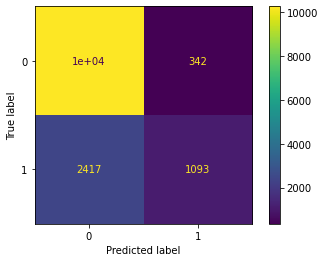

In [58]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [59]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     20023
           1       0.79      0.33      0.46      6880

    accuracy                           0.81     26903
   macro avg       0.80      0.65      0.67     26903
weighted avg       0.80      0.81      0.77     26903



In [60]:
accuracy_score(y_test,y_pred_test)

0.8047416843595188

In [61]:
confusion_matrix(y_test,y_pred_test)

array([[10278,   342],
       [ 2417,  1093]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


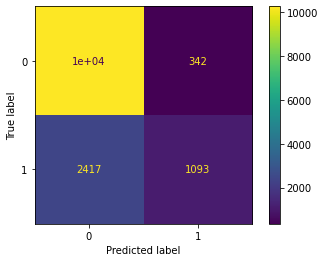

In [62]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [63]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     10620
           1       0.76      0.31      0.44      3510

    accuracy                           0.80     14130
   macro avg       0.79      0.64      0.66     14130
weighted avg       0.80      0.80      0.77     14130



## Model Improvement 1

In [64]:
svm_model = SVC(kernel='rbf',gamma= 1, C= 0.1)

In [65]:
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=1)

## Model Testing

In [66]:
y_pred_train = svm_model.predict(X_train)

In [67]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [68]:
accuracy_score(y_train,y_pred_train)

0.7967512916775081

In [69]:
confusion_matrix(y_train,y_pred_train)

array([[19491,   532],
       [ 4936,  1944]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


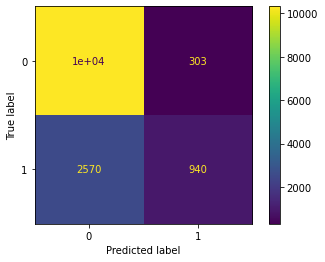

In [70]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [71]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     20023
           1       0.79      0.28      0.42      6880

    accuracy                           0.80     26903
   macro avg       0.79      0.63      0.65     26903
weighted avg       0.79      0.80      0.76     26903



In [72]:
accuracy_score(y_test,y_pred_test)

0.7966737438075018

In [73]:
confusion_matrix(y_test,y_pred_test)

array([[10317,   303],
       [ 2570,   940]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


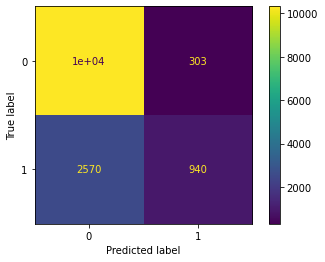

In [74]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [75]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     10620
           1       0.76      0.27      0.40      3510

    accuracy                           0.80     14130
   macro avg       0.78      0.62      0.64     14130
weighted avg       0.79      0.80      0.76     14130



## Model Improvement 2

In [76]:
svm_model = SVC(kernel='poly',gamma= 1, C= 0.1)

In [77]:
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='poly')

## Model Testing

In [78]:
y_pred_train = svm_model.predict(X_train)

In [79]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [80]:
accuracy_score(y_train,y_pred_train)

0.8423224175742482

In [81]:
confusion_matrix(y_train,y_pred_train)

array([[18872,  1151],
       [ 3091,  3789]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


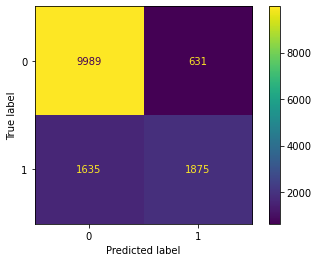

In [82]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [83]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     20023
           1       0.77      0.55      0.64      6880

    accuracy                           0.84     26903
   macro avg       0.81      0.75      0.77     26903
weighted avg       0.84      0.84      0.83     26903



In [84]:
accuracy_score(y_test,y_pred_test)

0.8396319886765746

In [85]:
confusion_matrix(y_test,y_pred_test)

array([[9989,  631],
       [1635, 1875]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


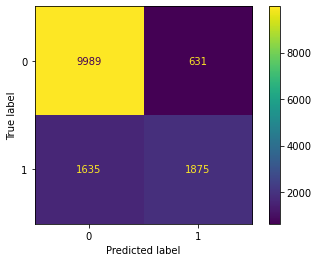

In [86]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [87]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10620
           1       0.75      0.53      0.62      3510

    accuracy                           0.84     14130
   macro avg       0.80      0.74      0.76     14130
weighted avg       0.83      0.84      0.83     14130



## Model Improvement 3

In [88]:
svm_model = SVC(kernel='poly',gamma= 0.8, C= 0.7)

In [89]:
svm_model.fit(X_train,y_train)

SVC(C=0.7, gamma=0.8, kernel='poly')

## Model Testing

In [90]:
y_pred_train = svm_model.predict(X_train)

In [91]:
y_pred_test = svm_model.predict(X_test)

## Model Evaluation

In [92]:
accuracy_score(y_train,y_pred_train)

0.8423967587257927

In [93]:
confusion_matrix(y_train,y_pred_train)

array([[18904,  1119],
       [ 3121,  3759]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


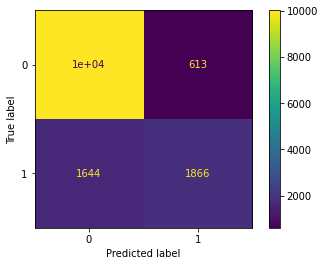

In [94]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [95]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     20023
           1       0.77      0.55      0.64      6880

    accuracy                           0.84     26903
   macro avg       0.81      0.75      0.77     26903
weighted avg       0.84      0.84      0.83     26903



In [96]:
accuracy_score(y_test,y_pred_test)

0.8402689313517339

In [97]:
confusion_matrix(y_test,y_pred_test)

array([[10007,   613],
       [ 1644,  1866]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


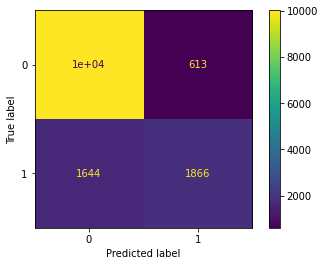

In [98]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [99]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10620
           1       0.75      0.53      0.62      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.74      0.76     14130
weighted avg       0.83      0.84      0.83     14130



Model 3 Is having final 84.23% Training Accuracy and 84% Testing Accuracy

## Model Deployment

In [107]:
from pickle import dump

In [108]:
dump(svm_model, open('Support_Vector_Machines_Salary_data','wb'))

In [109]:
from pickle import load

In [110]:
svm_model= load(open('/content/Support_Vector_Machines_Salary_data','rb'))

In [111]:
svm_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)